Last tutorial on this page should be exactly whats needed

https://docs.fast.ai/tutorial.vision

In [1]:
from fastai.vision.all import *

test paths

---

In [ ]:
path = Path('../')
labels_path = path/'download/labels/100_norm_imgs.csv'
images_path = path/'download/100_norm_images'

df = pd.read_csv(labels_path, names=['name','x_p','y_p'], header=None)

train paths

---

In [57]:
path = Path('../')
labels_path = path/'download/labels/norm_labels_4000.csv'
images_path = path/'download/norm_images'

df = pd.read_csv(labels_path, names=['name','x_p','y_p'], header=0)

In [58]:
df.head()

,name,x_p,y_p
0,0a0c1f65f19859c0.jpg,114.346667,56.320000
1,0a1dae8f71065201.jpg,124.160000,99.318683
2,0a1efc8533c96832.jpg,141.200000,110.800148
3,0a2ca221284ab461.jpg,99.781250,87.913018
4,0a3cf18c620e6a88.jpg,104.643750,99.527286


In [59]:
import re

def label_func(path_name):
    x = re.search(r'\d\w+.jpg', str(path_name))
    return x.group()

def get_focus_point(x):
    file_name = label_func(x)
    dfb = next(iter(df[df['name']==file_name].index), ('no match '+file_name))
    return tensor([float(df['x_p'][dfb]), float(df['y_p'][dfb])])

#get_focus_point(img_files[40])

In [16]:
img_files = get_image_files(images_path)

In [17]:
get_focus_point(img_files[40])

tensor([157.1475, 177.0308])

(256, 256)


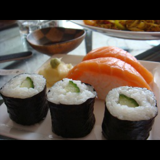

In [11]:
im = PILImage.create(img_files[5])
print(im.shape)
im.to_thumb(160)

In [60]:
imgs = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_focus_point,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    batch_tfms=[*aug_transforms(size=(256, 256)), 
                Normalize.from_stats(*imagenet_stats)],
    item_tfms=Resize(256),
)

In [61]:
dls = imgs.dataloaders(images_path, bs=32)

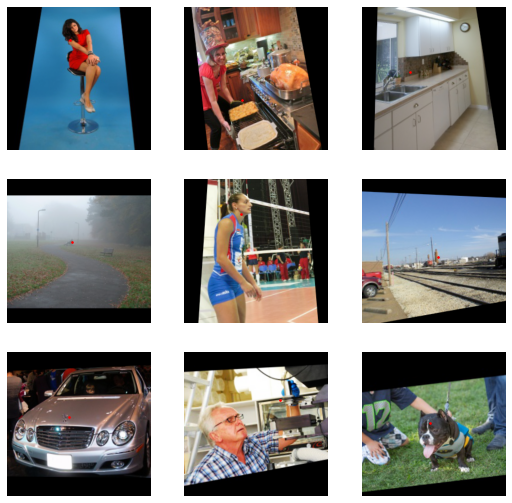

In [6]:
dls.show_batch()

In [62]:
learn = cnn_learner(dls, resnet18, y_range=(-1,1))

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=1.9054607491852948e-06)

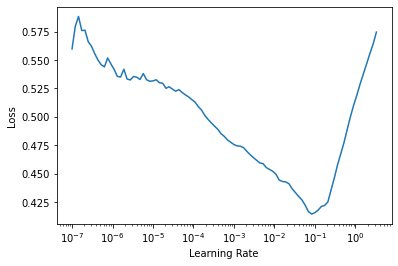

In [10]:
learn.lr_find()

In [63]:
learn.fine_tune(1, 8e-3) # see which values should be used

epoch,train_loss,valid_loss,time
0,0.088790,0.051869,10:23


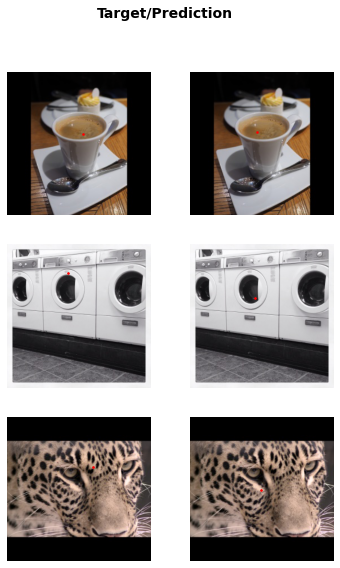

In [72]:
learn.show_results()

In [67]:
learn.export('./models/focusfinder_4000_resnet18.pkl')